## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  96.727520   625.928065  0.782851  8.337833  1.379184
1  80.011254   275.629413  0.946230  1.891693  1.263118
2  67.023511   573.076989  0.270547  2.937012  1.049734
3  43.492837  1271.715651  0.774602  3.058281  1.579983
4  76.367930   881.096523  0.594845  2.245454  1.427579


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.03493 | train_mse: 3.64088 | train_mae: 1.49289 |  0:00:00s
epoch 1  | loss: 0.76286 | train_mse: 2.44112 | train_mae: 1.20947 |  0:00:00s


epoch 2  | loss: 0.59913 | train_mse: 2.10402 | train_mae: 1.07499 |  0:00:00s
epoch 3  | loss: 0.65346 | train_mse: 2.28969 | train_mae: 1.09358 |  0:00:00s
epoch 4  | loss: 0.61318 | train_mse: 1.81103 | train_mae: 0.98014 |  0:00:00s


epoch 5  | loss: 0.61407 | train_mse: 0.94549 | train_mae: 0.75123 |  0:00:00s
epoch 6  | loss: 0.52613 | train_mse: 0.73233 | train_mae: 0.58806 |  0:00:00s
epoch 7  | loss: 0.45283 | train_mse: 0.70838 | train_mae: 0.57139 |  0:00:01s


epoch 8  | loss: 0.4685  | train_mse: 0.65941 | train_mae: 0.58491 |  0:00:01s
epoch 9  | loss: 0.38206 | train_mse: 0.75834 | train_mae: 0.60392 |  0:00:01s


epoch 10 | loss: 0.35882 | train_mse: 0.91653 | train_mae: 0.62629 |  0:00:01s
epoch 11 | loss: 0.22653 | train_mse: 0.90114 | train_mae: 0.60711 |  0:00:01s


epoch 12 | loss: 0.31337 | train_mse: 1.29272 | train_mae: 0.66196 |  0:00:01s
epoch 13 | loss: 0.37113 | train_mse: 1.02243 | train_mae: 0.59567 |  0:00:01s
epoch 14 | loss: 0.43713 | train_mse: 0.72153 | train_mae: 0.53364 |  0:00:01s


epoch 15 | loss: 0.38393 | train_mse: 0.72359 | train_mae: 0.52672 |  0:00:01s
epoch 16 | loss: 0.42592 | train_mse: 0.88662 | train_mae: 0.55345 |  0:00:02s
epoch 17 | loss: 0.28575 | train_mse: 0.81074 | train_mae: 0.5539  |  0:00:02s


epoch 18 | loss: 0.25598 | train_mse: 0.5468  | train_mae: 0.49677 |  0:00:02s
epoch 19 | loss: 0.23062 | train_mse: 0.80692 | train_mae: 0.53045 |  0:00:02s
epoch 20 | loss: 0.92181 | train_mse: 0.62879 | train_mae: 0.48897 |  0:00:02s


epoch 21 | loss: 0.23283 | train_mse: 0.33273 | train_mae: 0.41798 |  0:00:02s
epoch 22 | loss: 0.60129 | train_mse: 0.23762 | train_mae: 0.38889 |  0:00:02s


epoch 23 | loss: 0.40661 | train_mse: 0.30808 | train_mae: 0.4134  |  0:00:02s
epoch 24 | loss: 0.38174 | train_mse: 0.43945 | train_mae: 0.43654 |  0:00:02s
epoch 25 | loss: 0.22188 | train_mse: 0.67569 | train_mae: 0.4694  |  0:00:02s


epoch 26 | loss: 0.20458 | train_mse: 1.0562  | train_mae: 0.48284 |  0:00:02s
epoch 27 | loss: 0.29037 | train_mse: 1.00983 | train_mae: 0.4619  |  0:00:03s


epoch 28 | loss: 0.25635 | train_mse: 1.00218 | train_mae: 0.46163 |  0:00:03s
epoch 29 | loss: 0.20317 | train_mse: 0.94116 | train_mae: 0.46571 |  0:00:03s


epoch 30 | loss: 0.19454 | train_mse: 0.79795 | train_mae: 0.45645 |  0:00:03s
epoch 31 | loss: 0.26035 | train_mse: 1.07393 | train_mae: 0.47285 |  0:00:03s


epoch 32 | loss: 0.33117 | train_mse: 0.85988 | train_mae: 0.44257 |  0:00:03s
epoch 33 | loss: 0.43077 | train_mse: 0.55911 | train_mae: 0.39089 |  0:00:03s


epoch 34 | loss: 0.23911 | train_mse: 0.49228 | train_mae: 0.39407 |  0:00:04s
epoch 35 | loss: 0.21707 | train_mse: 0.44195 | train_mae: 0.39117 |  0:00:04s


epoch 36 | loss: 0.26198 | train_mse: 0.47696 | train_mae: 0.39526 |  0:00:04s
epoch 37 | loss: 0.22861 | train_mse: 0.50463 | train_mae: 0.39422 |  0:00:04s


epoch 38 | loss: 0.19854 | train_mse: 0.52206 | train_mae: 0.39644 |  0:00:04s
epoch 39 | loss: 0.24586 | train_mse: 0.28661 | train_mae: 0.35705 |  0:00:04s


epoch 40 | loss: 0.55781 | train_mse: 0.13979 | train_mae: 0.30286 |  0:00:04s
epoch 41 | loss: 0.46866 | train_mse: 0.25909 | train_mae: 0.36697 |  0:00:04s
epoch 42 | loss: 0.46738 | train_mse: 0.17736 | train_mae: 0.3298  |  0:00:05s


epoch 43 | loss: 0.43353 | train_mse: 0.17619 | train_mae: 0.32807 |  0:00:05s
epoch 44 | loss: 0.36213 | train_mse: 0.20212 | train_mae: 0.34499 |  0:00:05s


epoch 45 | loss: 0.3321  | train_mse: 0.23511 | train_mae: 0.37098 |  0:00:05s
epoch 46 | loss: 0.26123 | train_mse: 0.26684 | train_mae: 0.4143  |  0:00:05s


epoch 47 | loss: 0.26211 | train_mse: 0.29555 | train_mae: 0.42871 |  0:00:05s
epoch 48 | loss: 0.2453  | train_mse: 0.42989 | train_mae: 0.41435 |  0:00:05s


epoch 49 | loss: 0.25509 | train_mse: 0.31283 | train_mae: 0.35979 |  0:00:05s
epoch 50 | loss: 0.34546 | train_mse: 0.23411 | train_mae: 0.3349  |  0:00:05s
epoch 51 | loss: 0.24806 | train_mse: 0.2107  | train_mae: 0.35168 |  0:00:06s


epoch 52 | loss: 0.2601  | train_mse: 0.20412 | train_mae: 0.34781 |  0:00:06s
epoch 53 | loss: 0.23531 | train_mse: 0.21456 | train_mae: 0.32112 |  0:00:06s


epoch 54 | loss: 0.28107 | train_mse: 0.23036 | train_mae: 0.31647 |  0:00:06s
epoch 55 | loss: 0.19914 | train_mse: 0.34164 | train_mae: 0.35112 |  0:00:06s


epoch 56 | loss: 0.15817 | train_mse: 0.41856 | train_mae: 0.36702 |  0:00:06s
epoch 57 | loss: 0.30798 | train_mse: 0.37181 | train_mae: 0.36579 |  0:00:07s


epoch 58 | loss: 0.29796 | train_mse: 0.19431 | train_mae: 0.33018 |  0:00:07s


epoch 59 | loss: 0.22347 | train_mse: 0.13878 | train_mae: 0.31287 |  0:00:07s
epoch 60 | loss: 0.3755  | train_mse: 0.18023 | train_mae: 0.33306 |  0:00:07s
epoch 61 | loss: 0.31652 | train_mse: 0.15887 | train_mae: 0.31806 |  0:00:07s


epoch 62 | loss: 0.32275 | train_mse: 0.18634 | train_mae: 0.34589 |  0:00:07s
epoch 63 | loss: 0.19175 | train_mse: 0.19045 | train_mae: 0.34166 |  0:00:07s


epoch 64 | loss: 0.48552 | train_mse: 0.19067 | train_mae: 0.3271  |  0:00:07s
epoch 65 | loss: 0.2741  | train_mse: 0.35094 | train_mae: 0.37255 |  0:00:08s


epoch 66 | loss: 0.16218 | train_mse: 0.45821 | train_mae: 0.38721 |  0:00:08s
epoch 67 | loss: 0.3833  | train_mse: 0.40858 | train_mae: 0.36602 |  0:00:08s


epoch 68 | loss: 0.21312 | train_mse: 0.2321  | train_mae: 0.33155 |  0:00:08s
epoch 69 | loss: 0.13479 | train_mse: 0.14406 | train_mae: 0.28906 |  0:00:08s


epoch 70 | loss: 0.24538 | train_mse: 0.12517 | train_mae: 0.26868 |  0:00:08s
epoch 71 | loss: 0.237   | train_mse: 0.12695 | train_mae: 0.27601 |  0:00:09s


epoch 72 | loss: 0.1987  | train_mse: 0.15086 | train_mae: 0.30103 |  0:00:09s
epoch 73 | loss: 0.25676 | train_mse: 0.12974 | train_mae: 0.28623 |  0:00:09s


epoch 74 | loss: 0.26822 | train_mse: 0.11444 | train_mae: 0.27124 |  0:00:09s
epoch 75 | loss: 0.18019 | train_mse: 0.09722 | train_mae: 0.25825 |  0:00:09s


epoch 76 | loss: 0.19998 | train_mse: 0.11135 | train_mae: 0.26913 |  0:00:09s
epoch 77 | loss: 0.19924 | train_mse: 0.12258 | train_mae: 0.27346 |  0:00:09s


epoch 78 | loss: 0.17413 | train_mse: 0.1411  | train_mae: 0.2769  |  0:00:09s
epoch 79 | loss: 0.13286 | train_mse: 0.17963 | train_mae: 0.3141  |  0:00:10s
epoch 80 | loss: 0.16388 | train_mse: 0.21776 | train_mae: 0.31778 |  0:00:10s


epoch 81 | loss: 0.28967 | train_mse: 0.21051 | train_mae: 0.30669 |  0:00:10s
epoch 82 | loss: 0.128   | train_mse: 0.2001  | train_mae: 0.31056 |  0:00:10s
epoch 83 | loss: 0.1769  | train_mse: 0.21781 | train_mae: 0.31924 |  0:00:10s


epoch 84 | loss: 0.13609 | train_mse: 0.20107 | train_mae: 0.31783 |  0:00:10s
epoch 85 | loss: 0.1197  | train_mse: 0.20336 | train_mae: 0.31358 |  0:00:10s
epoch 86 | loss: 0.16731 | train_mse: 0.24028 | train_mae: 0.31452 |  0:00:10s


epoch 87 | loss: 0.13667 | train_mse: 0.23211 | train_mae: 0.30548 |  0:00:10s
epoch 88 | loss: 0.12078 | train_mse: 0.1517  | train_mae: 0.27201 |  0:00:11s


epoch 89 | loss: 0.12634 | train_mse: 0.13253 | train_mae: 0.27967 |  0:00:11s
epoch 90 | loss: 0.22698 | train_mse: 0.12364 | train_mae: 0.29019 |  0:00:11s


epoch 91 | loss: 0.23074 | train_mse: 0.11375 | train_mae: 0.28335 |  0:00:11s
epoch 92 | loss: 0.16294 | train_mse: 0.10525 | train_mae: 0.26445 |  0:00:11s
epoch 93 | loss: 0.22492 | train_mse: 0.12752 | train_mae: 0.27515 |  0:00:11s


epoch 94 | loss: 0.09215 | train_mse: 0.12753 | train_mae: 0.25684 |  0:00:11s
epoch 95 | loss: 0.2186  | train_mse: 0.10435 | train_mae: 0.24212 |  0:00:11s


epoch 96 | loss: 0.12189 | train_mse: 0.113   | train_mae: 0.24183 |  0:00:11s
epoch 97 | loss: 0.22275 | train_mse: 0.10256 | train_mae: 0.24777 |  0:00:12s


epoch 98 | loss: 0.19586 | train_mse: 0.09421 | train_mae: 0.23853 |  0:00:12s
epoch 99 | loss: 0.14528 | train_mse: 0.17004 | train_mae: 0.26138 |  0:00:12s


epoch 100| loss: 0.31286 | train_mse: 0.08844 | train_mae: 0.24328 |  0:00:12s
epoch 101| loss: 0.20165 | train_mse: 0.08282 | train_mae: 0.22783 |  0:00:12s


epoch 102| loss: 0.1182  | train_mse: 0.0804  | train_mae: 0.21801 |  0:00:12s


epoch 103| loss: 0.16924 | train_mse: 0.08759 | train_mae: 0.2267  |  0:00:13s
epoch 104| loss: 0.11388 | train_mse: 0.1059  | train_mae: 0.24942 |  0:00:13s


epoch 105| loss: 0.159   | train_mse: 0.10159 | train_mae: 0.25126 |  0:00:13s


epoch 106| loss: 0.1092  | train_mse: 0.09847 | train_mae: 0.25908 |  0:00:13s


epoch 107| loss: 0.19327 | train_mse: 0.0962  | train_mae: 0.25766 |  0:00:13s
epoch 108| loss: 0.20891 | train_mse: 0.09311 | train_mae: 0.2518  |  0:00:14s


epoch 109| loss: 0.19402 | train_mse: 0.09284 | train_mae: 0.24893 |  0:00:14s


epoch 110| loss: 0.13073 | train_mse: 0.08664 | train_mae: 0.23965 |  0:00:15s


epoch 111| loss: 0.33574 | train_mse: 0.09622 | train_mae: 0.25347 |  0:00:15s


epoch 112| loss: 0.11681 | train_mse: 0.10976 | train_mae: 0.26994 |  0:00:15s


epoch 113| loss: 0.12955 | train_mse: 0.11633 | train_mae: 0.27705 |  0:00:16s
epoch 114| loss: 0.32344 | train_mse: 0.10519 | train_mae: 0.27251 |  0:00:16s


epoch 115| loss: 0.20669 | train_mse: 0.14441 | train_mae: 0.28133 |  0:00:16s


epoch 116| loss: 0.18335 | train_mse: 0.16311 | train_mae: 0.27934 |  0:00:17s
epoch 117| loss: 0.2135  | train_mse: 0.14573 | train_mae: 0.28554 |  0:00:17s


epoch 118| loss: 0.34663 | train_mse: 0.13777 | train_mae: 0.29097 |  0:00:17s


epoch 119| loss: 0.23796 | train_mse: 0.13835 | train_mae: 0.29984 |  0:00:17s
epoch 120| loss: 0.1719  | train_mse: 0.13784 | train_mae: 0.29488 |  0:00:17s


epoch 121| loss: 0.27017 | train_mse: 0.13148 | train_mae: 0.29391 |  0:00:18s


epoch 122| loss: 0.16431 | train_mse: 0.10192 | train_mae: 0.26004 |  0:00:18s


epoch 123| loss: 0.17064 | train_mse: 0.08845 | train_mae: 0.24749 |  0:00:19s


epoch 124| loss: 0.12218 | train_mse: 0.10021 | train_mae: 0.24384 |  0:00:19s


epoch 125| loss: 0.16327 | train_mse: 0.15518 | train_mae: 0.27416 |  0:00:20s


epoch 126| loss: 0.14883 | train_mse: 0.21315 | train_mae: 0.27788 |  0:00:20s


epoch 127| loss: 0.13779 | train_mse: 0.23288 | train_mae: 0.27066 |  0:00:21s


epoch 128| loss: 0.14182 | train_mse: 0.19742 | train_mae: 0.26947 |  0:00:21s


epoch 129| loss: 0.17833 | train_mse: 0.17485 | train_mae: 0.27853 |  0:00:21s
epoch 130| loss: 0.11894 | train_mse: 0.21423 | train_mae: 0.29307 |  0:00:22s


epoch 131| loss: 0.35577 | train_mse: 0.24779 | train_mae: 0.3079  |  0:00:22s


epoch 132| loss: 0.18802 | train_mse: 0.2101  | train_mae: 0.29343 |  0:00:22s
epoch 133| loss: 0.23399 | train_mse: 0.15915 | train_mae: 0.27519 |  0:00:22s


epoch 134| loss: 0.13485 | train_mse: 0.12539 | train_mae: 0.25625 |  0:00:22s
epoch 135| loss: 0.13053 | train_mse: 0.10634 | train_mae: 0.23986 |  0:00:23s


epoch 136| loss: 0.08268 | train_mse: 0.1094  | train_mae: 0.24688 |  0:00:23s
epoch 137| loss: 0.13443 | train_mse: 0.10534 | train_mae: 0.24171 |  0:00:23s
epoch 138| loss: 0.09965 | train_mse: 0.09845 | train_mae: 0.23431 |  0:00:23s


epoch 139| loss: 0.16574 | train_mse: 0.11105 | train_mae: 0.23856 |  0:00:23s
epoch 140| loss: 0.1016  | train_mse: 0.12103 | train_mae: 0.237   |  0:00:23s


epoch 141| loss: 0.11016 | train_mse: 0.13227 | train_mae: 0.24265 |  0:00:23s
epoch 142| loss: 0.25704 | train_mse: 0.12605 | train_mae: 0.24207 |  0:00:23s


epoch 143| loss: 0.23965 | train_mse: 0.08136 | train_mae: 0.2289  |  0:00:23s
epoch 144| loss: 0.11419 | train_mse: 0.06975 | train_mae: 0.22006 |  0:00:23s
epoch 145| loss: 0.10761 | train_mse: 0.07096 | train_mae: 0.21853 |  0:00:24s


epoch 146| loss: 0.14769 | train_mse: 0.06592 | train_mae: 0.21126 |  0:00:24s


epoch 147| loss: 0.10042 | train_mse: 0.07403 | train_mae: 0.21337 |  0:00:24s
epoch 148| loss: 0.11135 | train_mse: 0.08685 | train_mae: 0.21537 |  0:00:24s


epoch 149| loss: 0.13302 | train_mse: 0.12085 | train_mae: 0.25299 |  0:00:24s
epoch 150| loss: 0.13328 | train_mse: 0.12211 | train_mae: 0.24114 |  0:00:24s


epoch 151| loss: 0.12328 | train_mse: 0.15316 | train_mae: 0.25356 |  0:00:25s


epoch 152| loss: 0.1269  | train_mse: 0.16084 | train_mae: 0.23905 |  0:00:25s


epoch 153| loss: 0.14794 | train_mse: 0.09497 | train_mae: 0.22343 |  0:00:25s
epoch 154| loss: 0.14014 | train_mse: 0.13234 | train_mae: 0.23295 |  0:00:25s


epoch 155| loss: 0.14805 | train_mse: 0.07913 | train_mae: 0.22207 |  0:00:26s
epoch 156| loss: 0.14455 | train_mse: 0.09048 | train_mae: 0.23568 |  0:00:26s


epoch 157| loss: 0.1405  | train_mse: 0.14673 | train_mae: 0.25468 |  0:00:26s


epoch 158| loss: 0.11869 | train_mse: 0.15615 | train_mae: 0.24731 |  0:00:26s


epoch 159| loss: 0.30072 | train_mse: 0.16109 | train_mae: 0.2652  |  0:00:26s
epoch 160| loss: 0.12189 | train_mse: 0.09852 | train_mae: 0.22633 |  0:00:27s


epoch 161| loss: 0.33861 | train_mse: 0.08498 | train_mae: 0.23121 |  0:00:27s
epoch 162| loss: 0.2117  | train_mse: 0.08188 | train_mae: 0.23488 |  0:00:27s


epoch 163| loss: 0.14646 | train_mse: 0.08169 | train_mae: 0.23063 |  0:00:27s


epoch 164| loss: 0.19311 | train_mse: 0.0901  | train_mae: 0.23705 |  0:00:27s
epoch 165| loss: 0.1733  | train_mse: 0.12287 | train_mae: 0.24777 |  0:00:27s


epoch 166| loss: 0.22249 | train_mse: 0.12647 | train_mae: 0.26227 |  0:00:28s
epoch 167| loss: 0.1116  | train_mse: 0.12967 | train_mae: 0.27182 |  0:00:28s


epoch 168| loss: 0.15508 | train_mse: 0.14033 | train_mae: 0.28374 |  0:00:28s
epoch 169| loss: 0.31102 | train_mse: 0.30022 | train_mae: 0.30923 |  0:00:28s


epoch 170| loss: 0.23811 | train_mse: 0.30128 | train_mae: 0.3032  |  0:00:28s
epoch 171| loss: 0.29095 | train_mse: 0.24972 | train_mae: 0.28458 |  0:00:28s


epoch 172| loss: 0.2687  | train_mse: 0.24438 | train_mae: 0.2847  |  0:00:28s
epoch 173| loss: 0.3256  | train_mse: 0.3107  | train_mae: 0.34412 |  0:00:28s


epoch 174| loss: 0.23453 | train_mse: 0.39808 | train_mae: 0.39559 |  0:00:29s
epoch 175| loss: 0.28179 | train_mse: 0.42385 | train_mae: 0.39755 |  0:00:29s


epoch 176| loss: 0.28186 | train_mse: 0.41383 | train_mae: 0.38831 |  0:00:29s
epoch 177| loss: 0.23005 | train_mse: 0.38056 | train_mae: 0.38144 |  0:00:29s


epoch 178| loss: 0.23539 | train_mse: 0.32401 | train_mae: 0.35318 |  0:00:29s


epoch 179| loss: 0.17828 | train_mse: 0.27787 | train_mae: 0.32557 |  0:00:29s
epoch 180| loss: 0.21121 | train_mse: 0.29382 | train_mae: 0.33795 |  0:00:30s


epoch 181| loss: 0.18862 | train_mse: 0.23184 | train_mae: 0.30933 |  0:00:30s


epoch 182| loss: 0.21187 | train_mse: 0.19352 | train_mae: 0.28843 |  0:00:30s
epoch 183| loss: 0.28179 | train_mse: 0.28592 | train_mae: 0.34688 |  0:00:30s


epoch 184| loss: 0.20223 | train_mse: 0.23525 | train_mae: 0.31893 |  0:00:31s
epoch 185| loss: 0.28817 | train_mse: 0.23657 | train_mae: 0.33329 |  0:00:31s


epoch 186| loss: 0.18876 | train_mse: 0.19194 | train_mae: 0.30606 |  0:00:31s


epoch 187| loss: 0.25912 | train_mse: 0.2774  | train_mae: 0.33062 |  0:00:31s


epoch 188| loss: 0.32344 | train_mse: 0.5174  | train_mae: 0.42081 |  0:00:32s


epoch 189| loss: 0.4951  | train_mse: 0.53296 | train_mae: 0.43507 |  0:00:32s


epoch 190| loss: 0.30133 | train_mse: 0.31379 | train_mae: 0.32627 |  0:00:32s
epoch 191| loss: 0.2849  | train_mse: 0.19261 | train_mae: 0.30103 |  0:00:33s


epoch 192| loss: 0.59869 | train_mse: 0.21037 | train_mae: 0.31715 |  0:00:33s


epoch 193| loss: 0.22329 | train_mse: 0.30644 | train_mae: 0.35657 |  0:00:33s


epoch 194| loss: 0.26223 | train_mse: 0.31983 | train_mae: 0.34887 |  0:00:34s


epoch 195| loss: 0.27742 | train_mse: 0.21615 | train_mae: 0.30599 |  0:00:34s


epoch 196| loss: 0.3191  | train_mse: 0.18318 | train_mae: 0.28562 |  0:00:34s

Early stopping occurred at epoch 196 with best_epoch = 146 and best_train_mae = 0.21126
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

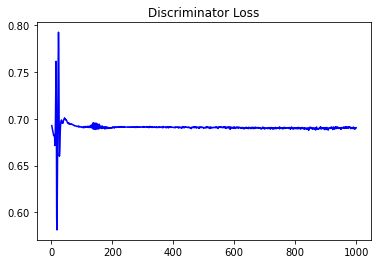

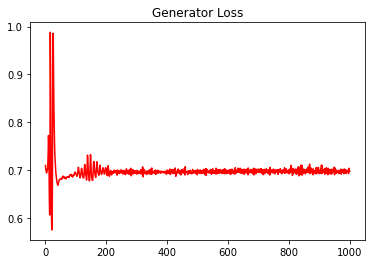

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.6296144083888828


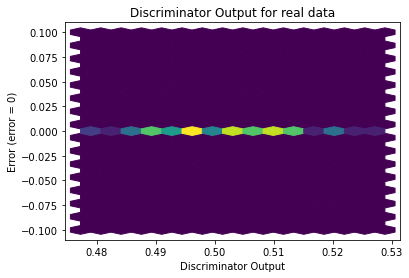

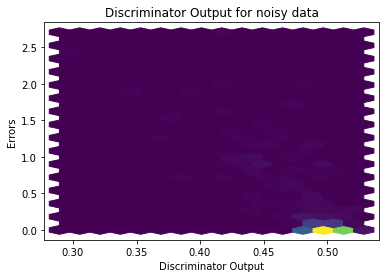

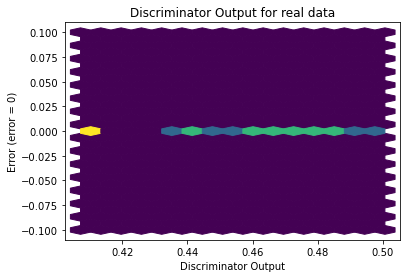

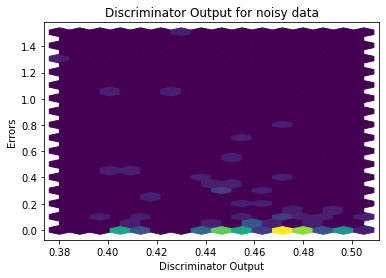

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


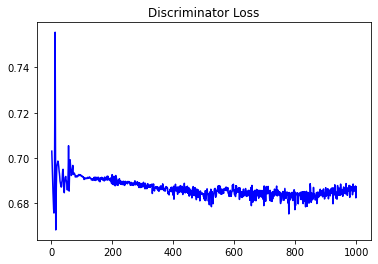

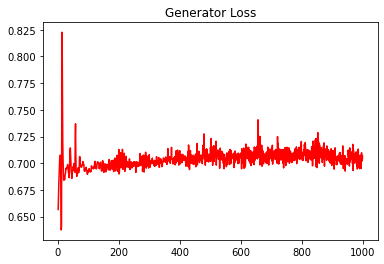

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
1.5751455838918687


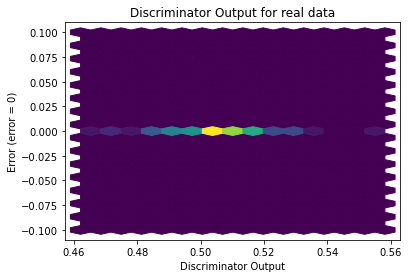

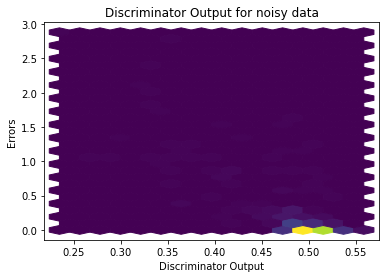

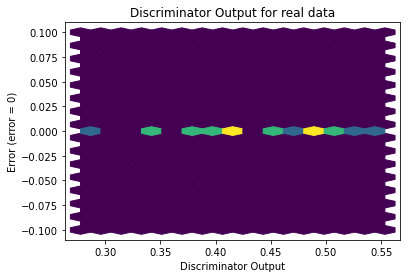

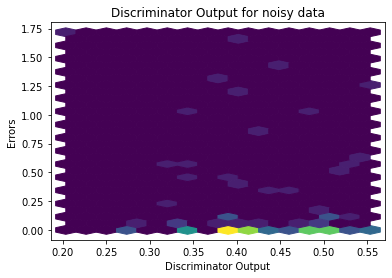

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3872]], requires_grad=True)
